In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [2]:
train_dir = 'Data/three_animals/train'
test_dir = 'Data/three_animals/validate/'

train_datagen = ImageDataGenerator(
                    rescale=1/255.,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    batch_size=32,
                    target_size=(150,150),
                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    batch_size=32,
                    target_size=(150,150),
                    class_mode='categorical')

Found 2700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [3]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPool2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(train_generator, 
                    steps_per_epoch=85, 
                    epochs=3, 
                    validation_data=test_generator,
                    validation_steps=10,
                    verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 85 steps, validate for 10 steps
Epoch 1/3
85/85 - 38s - loss: 1.8477 - accuracy: 0.5333 - val_loss: 0.8577 - val_accuracy: 0.6267
Epoch 2/3
85/85 - 23s - loss: 0.7756 - accuracy: 0.6748 - val_loss: 0.6090 - val_accuracy: 0.7600
Epoch 3/3
85/85 - 23s - loss: 0.7450 - accuracy: 0.6907 - val_loss: 0.7268 - val_accuracy: 0.7133


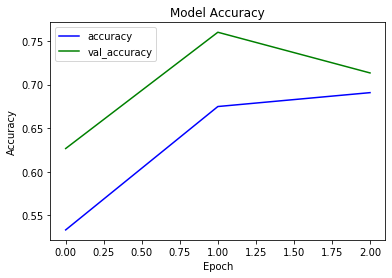

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.plot(range(len(acc)), acc, 'b', label='accuracy')
plt.plot(range(len(val_acc)), val_acc, 'g', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc=0)
plt.show()

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
fn = 'Data/three_animals/validate/cats/cats_00913.jpg'
img = load_img(fn, target_size=(150, 150))
x = img_to_array(img)/255.
x = np.expand_dims(x, axis=0)

classes = model.predict(x, batch_size=10)
print(train_generator.class_indices)
print(classes.argmax())

{'cats': 0, 'panda': 1, 'raccoons': 2}
[[1. 0. 0.]]


In [20]:
classes.argmax()

0